11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 30ms/step - accuracy: 0.8801 - loss: 0.3818 - val_accuracy: 0.9818 - val_loss: 0.0668
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9821 - loss: 0.0561 - val_accuracy: 0.9902 - val_loss: 0.0387
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.9885 - loss: 0.0348 - val_accuracy: 0.9892 - val_loss: 0.0437
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9914 - loss: 0.0269 - val_accuracy: 0.9913 - val_loss: 0.0305
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9929 - loss: 0.0208 - val_accuracy: 0.9908 - val_loss: 0.0332
313/313 - 2s - 8ms/step - accuracy: 0.9895 - loss: 0.0329
Test accuracy: 0.9895
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


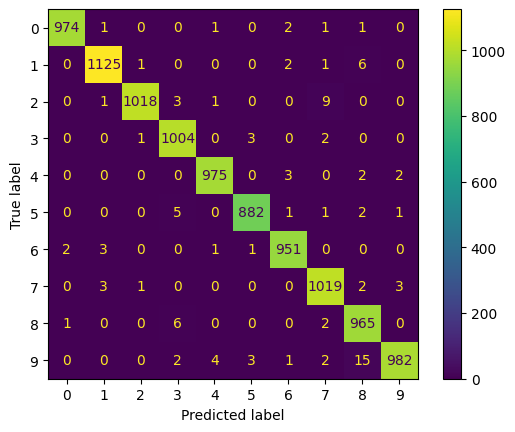

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class MNISTClassifier:
    def __init__(self):
        # Load and preprocess the data
        self.x_train, self.y_train, self.x_test, self.y_test = self.load_and_preprocess_data()
        self.model = self.build_model()

    def load_and_preprocess_data(self):
        # Load the MNIST dataset
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        # Normalize the data to the range [0, 1]
        x_train = x_train / 255.0
        x_test = x_test / 255.0

        # Reshape data to include channel dimension (28x28x1)
        x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
        x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

        return x_train, y_train, x_test, y_test

    def build_model(self):
        # Build a simple CNN model
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])
        # Compile the model
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        return model

    def train_model(self, epochs=5, validation_split=0.1):
        # Train the model
        history = self.model.fit(self.x_train, self.y_train, epochs=epochs, validation_split=validation_split)
        return history

    def evaluate_model(self):
        # Evaluate the model
        test_loss, test_acc = self.model.evaluate(self.x_test, self.y_test, verbose=2)
        print(f"Test accuracy: {test_acc:.4f}")
        return test_loss, test_acc

    def plot_confusion_matrix(self):
        # Predict and display the confusion matrix
        y_pred = np.argmax(self.model.predict(self.x_test), axis=1)
        cm = confusion_matrix(self.y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
        disp.plot(cmap='viridis')
        plt.show()

# Instantiate and run the MNIST classifier
if __name__ == "__main__":
    classifier = MNISTClassifier()
    classifier.train_model(epochs=5)
    classifier.evaluate_model()
    classifier.plot_confusion_matrix()